In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import os

In [63]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('FowlerModule07-2.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| Demand   | Month   | New Chip Introduced   |
|:---------|:--------|:----------------------|
| 3949     | 1       | 0                     |
| 3544     | 2       | 0                     |
| 6138     | 3       | 0                     |
| 7752     | 4       | 0                     |
| 10700    | 5       | 1                     |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Demand               24 non-null     int64
 1   Month                24 non-null     int64
 2   New Chip Introduced  24 non-null     int64
dtypes: int64(3)
memory usage: 708.0 bytes
None


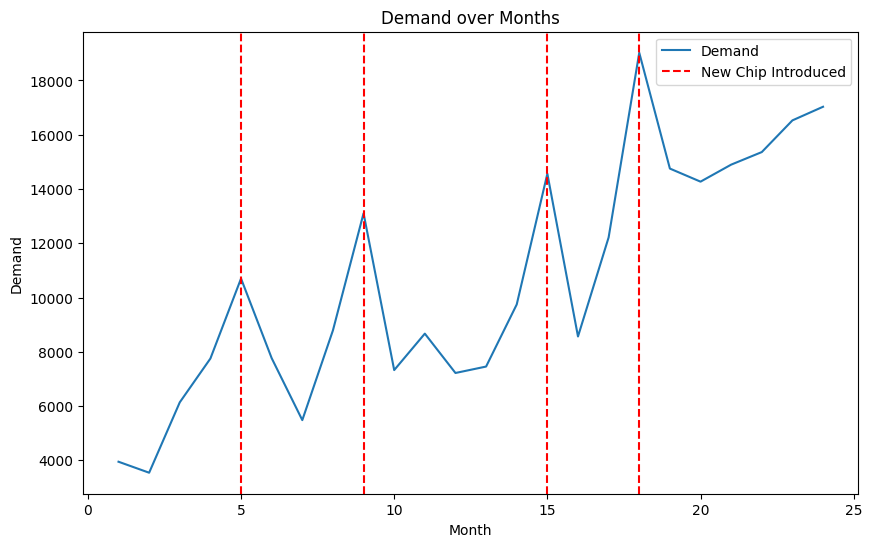

In [64]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='Month', y='Demand', label='Demand')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand over Months')

# Draw vertical dashed red lines where 'New Chip Introduced' is equal to 1
for month in df[df['New Chip Introduced'] == 1]['Month']:
    plt.axvline(x=month, color='red', linestyle='--', label='New Chip Introduced')

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

In [65]:
import statsmodels.formula.api as smf

# Convert New Chip Introduced to categorical
df['New Chip Introduced'] = df['New Chip Introduced'].astype('category')

# Create a causal regression model
model = smf.ols('Demand ~ Month + Q("New Chip Introduced")', data=df).fit()

# Create next month's data
next_month_new_chip = pd.DataFrame({'Month': [25], 'New Chip Introduced': [1]})
next_month_no_new_chip = pd.DataFrame({'Month': [25], 'New Chip Introduced': [0]})

# Predict demand for next month with and without a new chip
forecast_new_chip = model.predict(next_month_new_chip)
forecast_no_new_chip = model.predict(next_month_no_new_chip)

# Print the forecasts
print(f"Forecast for next month with new chip: {forecast_new_chip.iloc[0]:.2f}")
print(f"Forecast for next month without new chip: {forecast_no_new_chip.iloc[0]:.2f}")

Forecast for next month with new chip: 21442.31
Forecast for next month without new chip: 16486.45


In [66]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     86.40
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           7.35e-11
Time:                        15:18:12   Log-Likelihood:                -208.18
No. Observations:                  24   AIC:                             422.4
Df Residuals:                      21   BIC:                             425.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

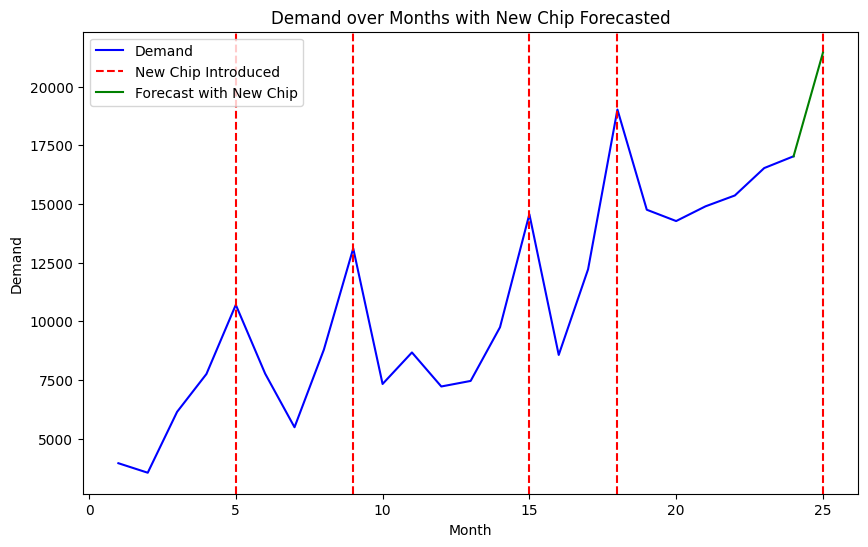

In [67]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Demand', label='Demand', color='blue')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand over Months with New Chip Forecasted')

# Draw vertical dashed red lines where 'New Chip Introduced' is equal to 1
for i, month in enumerate(df[df['New Chip Introduced'] == 1]['Month']):
    if i == 0:  # Add label only to the first line
        plt.axvline(x=month, color='red', linestyle='--', label='New Chip Introduced')
    else:
        plt.axvline(x=month, color='red', linestyle='--')

# Add a dashed vertical red line at month 25
plt.axvline(x=25, color='red', linestyle='--')

# Extend the line plot with the forecast for the next month with a new chip
forecast_months = np.append(df['Month'].values, next_month_new_chip['Month'].values)
forecast_values_with_chip = np.append(df['Demand'].values, forecast_new_chip.values)

# Plot the forecast segment separately in green
sns.lineplot(x=forecast_months[-2:], y=forecast_values_with_chip[-2:], color='green', label='Forecast with New Chip')

plt.legend()
plt.show()

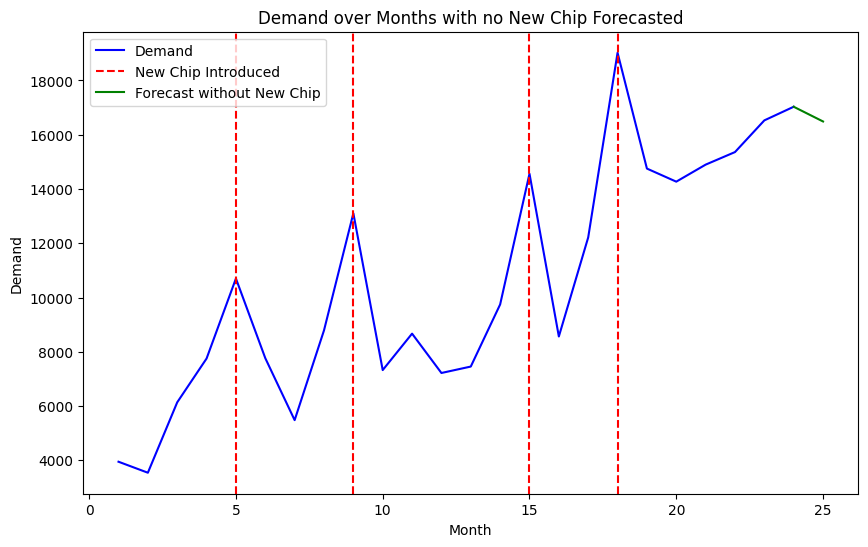

In [68]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Demand', label='Demand', color='blue')  # Set initial line color to blue
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand over Months with no New Chip Forecasted')

# Draw vertical dashed red lines where 'New Chip Introduced' is equal to 1
for i, month in enumerate(df[df['New Chip Introduced'] == 1]['Month']):
    if i == 0:  # Add label only to the first line
        plt.axvline(x=month, color='red', linestyle='--', label='New Chip Introduced')
    else:
        plt.axvline(x=month, color='red', linestyle='--')

# Extend the line plot with the forecast for the next month without a new chip
forecast_months = np.append(df['Month'].values, next_month_no_new_chip['Month'].values)
forecast_values_without_chip = np.append(df['Demand'].values, forecast_no_new_chip.values)

# Plot the forecast segment separately in green
sns.lineplot(x=forecast_months[-2:], y=forecast_values_without_chip[-2:], color='green', label='Forecast without New Chip')

plt.legend()  # Show the legend
plt.show()
